In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [10]:
# Load the dataset
file_path = '/content/Mall_Customers.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display basic information
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Select relevant features for clustering
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


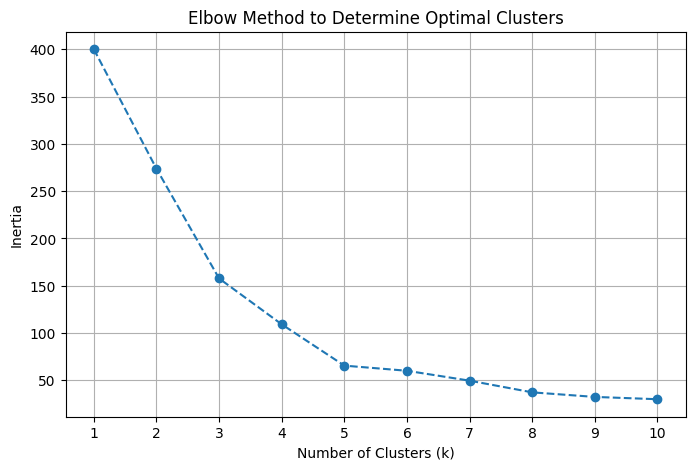

In [12]:
# Use the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid()
plt.show()


In [13]:
# Choose the optimal number of clusters (e.g., 5 based on the Elbow Method)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Display cluster centroids
print("Cluster Centers:")
print(kmeans.cluster_centers_)


Cluster Centers:
[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


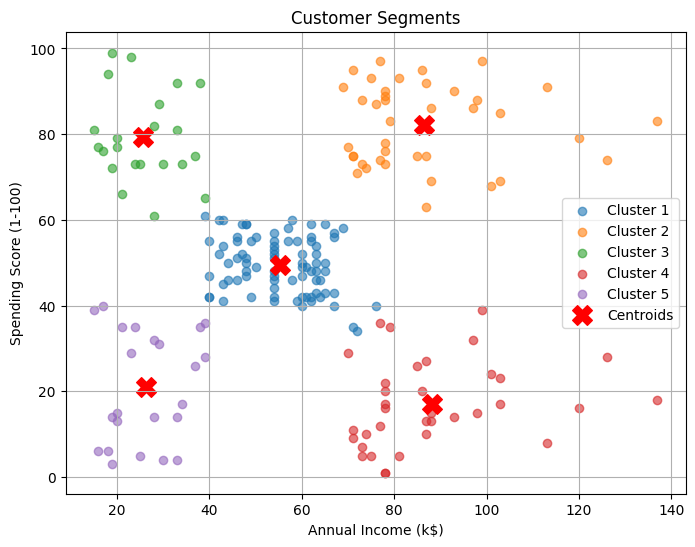

In [14]:
# Plot clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        label=f'Cluster {cluster + 1}', alpha=0.6
    )

# Plot centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c='red', marker='X', label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()


In [15]:
# Save the data with cluster labels
data.to_csv('/content/Clustered_Customers.csv', index=False)  # Update path as needed
print("Clustered data saved successfully.")


Clustered data saved successfully.


In [16]:
# Display a sample of the clustered data
print("Sample of the clustered data:")
display(data.head())

# Group data by clusters and compute statistics for each cluster
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Summary (Average Annual Income and Spending Score):")
display(cluster_summary)

# Count of customers in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()
print("\nNumber of Customers in Each Cluster:")
display(cluster_counts)


Sample of the clustered data:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4



Cluster Summary (Average Annual Income and Spending Score):


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043



Number of Customers in Each Cluster:


,count
Cluster,
0,81
1,39
2,22
3,35
4,23
